In [1]:
%load_ext autoreload
%autoreload 2

from knnClassifer import KNearestNeighbor
import numpy as np
import pandas as pd

try:
    del X_train, y_train
    del test_dataset, y_test_pred
    print('Clear previously loaded data.')
except:
    pass

# load datasets

train_dataset = pd.read_csv("./datasets/mnist/train.csv", sep=",", dtype=int).to_numpy()
test_dataset = pd.read_csv("./datasets/mnist/test.csv", sep=",", dtype=int).to_numpy()

In [2]:
# train

X_train = train_dataset[:, 1:].astype(np.uint8)
y_train = np.ravel(train_dataset[:, [0,]]).astype(np.uint8)

print(X_train.shape)
print(y_train.shape)
print(test_dataset.shape)

classifier = KNearestNeighbor()
classifier.train(X_train, y_train)

(42000, 784)
(42000,)
(28000, 784)


In [3]:
# cross validation

num_folds = 5

X_train_folds = np.array(np.array_split(X_train, X_train.shape[0]/num_folds)).astype(np.uint8)
y_train_folds = np.array(np.array_split(y_train, y_train.shape[0]/num_folds)).astype(np.uint8)

print(X_train.shape)

k_choices = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
k_accuracies = {}

# print(y_train)

# calculate accuracies for each fold against each k and store them in k_accuracies
for k in k_choices:
    k_accuracies[k] = []
    for i in range(num_folds):
        preds = classifier.predict(X_train_folds[i], k)
        accuracy = float(np.sum(preds == y_train_folds[i])) / num_folds
        k_accuracies[k].append(accuracy)
        
    print("ran k:", k)

(42000, 784)
ran k: 1
ran k: 2
ran k: 3
ran k: 4
ran k: 5
ran k: 6
ran k: 7
ran k: 8
ran k: 9
ran k: 10


In [4]:
for k in sorted(k_accuracies):
    for accuracy in k_accuracies[k]:
        print('k = %d, accuracy = %f' % (k, accuracy))

k = 1, accuracy = 0.400000
k = 1, accuracy = 0.000000
k = 1, accuracy = 0.200000
k = 1, accuracy = 0.200000
k = 1, accuracy = 0.200000
k = 2, accuracy = 0.400000
k = 2, accuracy = 0.000000
k = 2, accuracy = 0.200000
k = 2, accuracy = 0.200000
k = 2, accuracy = 0.400000
k = 3, accuracy = 0.400000
k = 3, accuracy = 0.000000
k = 3, accuracy = 0.200000
k = 3, accuracy = 0.200000
k = 3, accuracy = 0.200000
k = 4, accuracy = 0.400000
k = 4, accuracy = 0.000000
k = 4, accuracy = 0.200000
k = 4, accuracy = 0.400000
k = 4, accuracy = 0.200000
k = 5, accuracy = 0.400000
k = 5, accuracy = 0.000000
k = 5, accuracy = 0.200000
k = 5, accuracy = 0.400000
k = 5, accuracy = 0.000000
k = 6, accuracy = 0.400000
k = 6, accuracy = 0.000000
k = 6, accuracy = 0.200000
k = 6, accuracy = 0.400000
k = 6, accuracy = 0.000000
k = 7, accuracy = 0.400000
k = 7, accuracy = 0.000000
k = 7, accuracy = 0.200000
k = 7, accuracy = 0.200000
k = 7, accuracy = 0.000000
k = 8, accuracy = 0.400000
k = 8, accuracy = 0.000000
k

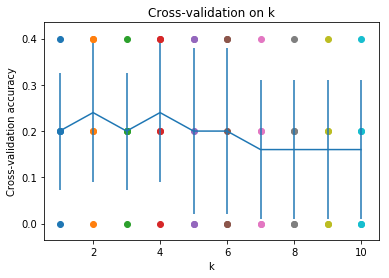

In [6]:
import matplotlib.pyplot as plt

for k in k_choices:
    accuracies = k_accuracies[k]
    plt.scatter([k] * len(accuracies), accuracies)
    
accuracies_mean = np.array([np.mean(v) for k,v in sorted(k_accuracies.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(k_accuracies.items())])
plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as knn
neigh = knn(n_neighbors=3)
neigh.fit(X_train, y_train)
neigh.predict(test_dataset)
# best_k = 4

# print(test_dataset.shape)

# y_preds = classifier.predict(test_dataset[:50], k=best_k)

# print(y_preds)